<a href="https://colab.research.google.com/github/Veronikakiti/my_final_project/blob/main/salary_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Анализ уровня заработных плат в России

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

Для анализа будем использовать данные о "Среднемесячной номинальной начисленной заработной плате работников организаций по видам экономической деятельности в РФ за 2000-2023 гг." из Росстата ([ссылка](https://rosstat.gov.ru/labor_market_employment_salaries)) \
Данные об уровне инфляции находятся [здесь](https://уровень-инфляции.рф/таблицы-инфляции)

In [ ]:
#загрузка данных
df = pd.read_excel("https://rosstat.gov.ru/storage/mediabank/tab3-zpl_2023.xlsx", sheet_name=None, index_col=0)

**Предварительная обработка данных по зарплатам**

In [ ]:
# обработка данных первого листа "с 2017 г."
df['с 2017 г.'].head()

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
СРЕДНЕМЕСЯЧНАЯ НОМИНАЛЬНАЯ НАЧИСЛЕННАЯ ЗАРАБОТНАЯ ПЛАТА РАБОТНИКОВ ПО ПОЛНОМУ КРУГУ,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ОРГАНИЗАЦИЙ ПО ВИДАМ ЭКОНОМИЧЕСКОЙ ДЕЯТЕЛЬНОСТИ (в соответствии с ОКВЭД2) В РОССИЙСКОЙ ФЕДЕРАЦИИ с 2017 года рублей,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,20171),2018.0,2019.0,2020.0,2021.0,20222),"20232), 3)"
Всего,39167,43724.0,47866.8,51344.0,57243.7,65338.3,73709.3


In [ ]:
df['с 2017 г.'].dropna(how='all', inplace=True)
df['с 2017 г.'].head(10)

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
NaN,20171),2018.0,2019.0,2020.0,2021.0,20222),"20232), 3)"
Всего,39167,43724.0,47866.8,51344.0,57243.7,65338.3,73709.3
"сельское, лесное хозяйство, охота, рыболовство и рыбоводство",25671.1,28699.0,31727.6,34770.0,39436.8,46777,52868.3
"растениеводство и животноводство, охота и предоставление соответствующих услуг в этих областях",23529.1,25820.0,28395.8,31058.0,35460.2,41993.7,47582.9
лесоводство и лесозаготовки,27616.6,32701.0,35426.2,37855.0,42151.8,48327.2,52416.3
рыболовство и рыбоводство,68032,75766.0,88603.8,94983.0,101547.4,121726.2,139520
добыча полезных ископаемых,74474.1,83178.0,89343.7,95359.0,103473.5,118375.7,130825.6
добыча угля,53065,59439.0,63352.8,62600.0,73576.6,90716.5,106102.6
добыча нефти и природного газа,104078.3,127771.0,135363.7,142175.0,149585.1,165623.8,180514.7
добыча металлических руд,61121.9,70721.0,78519.9,88154.0,96365.2,108316.6,119578.2


In [ ]:
# преобразуем первую строку в заголовки столбцов(года)
df['с 2017 г.'].columns = df['с 2017 г.'].iloc[0]
df['с 2017 г.'] = df['с 2017 г.'][1:]
df['с 2017 г.'].head()

nan,20171),2018.0,2019.0,2020.0,2021.0,20222),"20232), 3)"
Всего,39167,43724.0,47866.8,51344.0,57243.7,65338.3,73709.3
"сельское, лесное хозяйство, охота, рыболовство и рыбоводство",25671.1,28699.0,31727.6,34770.0,39436.8,46777,52868.3
"растениеводство и животноводство, охота и предоставление соответствующих услуг в этих областях",23529.1,25820.0,28395.8,31058.0,35460.2,41993.7,47582.9
лесоводство и лесозаготовки,27616.6,32701.0,35426.2,37855.0,42151.8,48327.2,52416.3
рыболовство и рыбоводство,68032,75766.0,88603.8,94983.0,101547.4,121726.2,139520


In [ ]:
# создадим список  годов и преобразуем их в правильный формат
list(df['с 2017 г.'])

['20171)', 2018.0, 2019.0, 2020.0, 2021.0, '20222)', '20232), 3)']

In [ ]:
def rename_column_name(column_name):
  return int(column_name) if len(str(column_name)) == 4 else int(str(column_name)[:4])

In [ ]:
df['с 2017 г.'].columns = list(map(rename_column_name, df['с 2017 г.'].columns))
df['с 2017 г.'].columns = df['с 2017 г.'].columns.astype(int)
df['с 2017 г.'].head()

,2017,2018,2019,2020,2021,2022,2023
Всего,39167,43724.0,47866.8,51344.0,57243.7,65338.3,73709.3
"сельское, лесное хозяйство, охота, рыболовство и рыбоводство",25671.1,28699.0,31727.6,34770.0,39436.8,46777,52868.3
"растениеводство и животноводство, охота и предоставление соответствующих услуг в этих областях",23529.1,25820.0,28395.8,31058.0,35460.2,41993.7,47582.9
лесоводство и лесозаготовки,27616.6,32701.0,35426.2,37855.0,42151.8,48327.2,52416.3
рыболовство и рыбоводство,68032,75766.0,88603.8,94983.0,101547.4,121726.2,139520


In [ ]:
# посмотрим даннные по последним 5 видам деятельности
df['с 2017 г.'].tail()

,2017,2018,2019,2020,2021,2022,2023
деятельность административная и сопутствующие дополнительные услуги,27621.5,31706.0,34002.4,37090.0,39225.1,45067.3,49379.4
государственное управление и обеспечение военной безопасности; социальное обеспечение,43499.7,47803.0,50990.5,54496.0,58620.3,63505.2,73860.9
образование,30257.6,34361.0,37071.9,39563.0,43390.5,48400.2,54262.7
деятельность в области здравоохранения и социальных услуг,31980.3,40027.0,43122.1,49532.0,50690.1,55419.6,61485.5
"деятельность в области культуры, спорта, организации досуга и развлечений",38200.1,44439.0,46990.4,48445.0,53340.3,57490.6,64929.1


In [ ]:
# обработка данных 2-го листа "2000-2016 гг."
df['2000-2016 гг.'].head()

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
СРЕДНЕМЕСЯЧНАЯ НОМИНАЛЬНАЯ НАЧИСЛЕННАЯ ЗАРАБОТНАЯ ПЛАТА РАБОТНИКОВ ПО ПОЛНОМУ КРУГУ ОРГАНИЗАЦИЙ ПО ВИДАМ ЭКОНОМИЧЕСКОЙ ДЕЯТЕЛЬНОСТИ (в соответствии с ОКВЭД-2007) В РОССИЙСКОЙ ФЕДЕРАЦИИ ЗА 2000-2016гг.,,,,,,,,,,,,,,,,,
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,рублей,NaN,NaN,NaN,NaN,NaN,NaN
NaN,2000.0,2001.0,2002.0,2003.0,2004.0,2005.0,2006.0,2007.0,2008.0,2009.0,2010,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0
Всего по экономике,2223.4,3240.4,4360.3,5498.5,6739.5,8554.9,10633.9,13593.4,17290.1,18637.5,20952.2,23369.2,26628.9,29792.0,32495.0,34030.0,36709.0
"Сельское хозяйство, охота и лесное хозяйство",985.1,1434.6,1876.4,2339.8,3015.4,3646.2,4568.7,6143.8,8474.8,9619.2,10668.1,12464.0,14129.4,15724.0,17724.0,19721.0,21755.0
"Рыболовство, рыбоводство",2845.6,3839.3,5031.3,5444.5,7084.9,10233.5,12310.8,14797.0,19498.9,22913.5,23781.9,25939.9,29201.4,32437.3,37062.0,46676.0,54927.0


In [ ]:
df['2000-2016 гг.'].dropna(how='all', inplace=True)
df['2000-2016 гг.'].head()

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
СРЕДНЕМЕСЯЧНАЯ НОМИНАЛЬНАЯ НАЧИСЛЕННАЯ ЗАРАБОТНАЯ ПЛАТА РАБОТНИКОВ ПО ПОЛНОМУ КРУГУ ОРГАНИЗАЦИЙ ПО ВИДАМ ЭКОНОМИЧЕСКОЙ ДЕЯТЕЛЬНОСТИ (в соответствии с ОКВЭД-2007) В РОССИЙСКОЙ ФЕДЕРАЦИИ ЗА 2000-2016гг.,,,,,,,,,,,,,,,,,
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,рублей,NaN,NaN,NaN,NaN,NaN,NaN
NaN,2000.0,2001.0,2002.0,2003.0,2004.0,2005.0,2006.0,2007.0,2008.0,2009.0,2010,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0
Всего по экономике,2223.4,3240.4,4360.3,5498.5,6739.5,8554.9,10633.9,13593.4,17290.1,18637.5,20952.2,23369.2,26628.9,29792.0,32495.0,34030.0,36709.0
"Сельское хозяйство, охота и лесное хозяйство",985.1,1434.6,1876.4,2339.8,3015.4,3646.2,4568.7,6143.8,8474.8,9619.2,10668.1,12464.0,14129.4,15724.0,17724.0,19721.0,21755.0
"Рыболовство, рыбоводство",2845.6,3839.3,5031.3,5444.5,7084.9,10233.5,12310.8,14797.0,19498.9,22913.5,23781.9,25939.9,29201.4,32437.3,37062.0,46676.0,54927.0


In [ ]:
# преобразуем первую строку в заголовки столбцов(года)
df['2000-2016 гг.'].columns = df['2000-2016 гг.'].iloc[1]
df['2000-2016 гг.'] = df['2000-2016 гг.'][2:]
df['2000-2016 гг.'].head()

nan,2000.0,2001.0,2002.0,2003.0,2004.0,2005.0,2006.0,2007.0,2008.0,2009.0,2010,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0
СРЕДНЕМЕСЯЧНАЯ НОМИНАЛЬНАЯ НАЧИСЛЕННАЯ ЗАРАБОТНАЯ ПЛАТА РАБОТНИКОВ ПО ПОЛНОМУ КРУГУ ОРГАНИЗАЦИЙ ПО ВИДАМ ЭКОНОМИЧЕСКОЙ ДЕЯТЕЛЬНОСТИ (в соответствии с ОКВЭД-2007) В РОССИЙСКОЙ ФЕДЕРАЦИИ ЗА 2000-2016гг.,,,,,,,,,,,,,,,,,
Всего по экономике,2223.4,3240.4,4360.3,5498.5,6739.5,8554.9,10633.9,13593.4,17290.1,18637.5,20952.2,23369.2,26628.9,29792.0,32495.0,34030.0,36709.0
"Сельское хозяйство, охота и лесное хозяйство",985.1,1434.6,1876.4,2339.8,3015.4,3646.2,4568.7,6143.8,8474.8,9619.2,10668.1,12464.0,14129.4,15724.0,17724.0,19721.0,21755.0
"Рыболовство, рыбоводство",2845.6,3839.3,5031.3,5444.5,7084.9,10233.5,12310.8,14797.0,19498.9,22913.5,23781.9,25939.9,29201.4,32437.3,37062.0,46676.0,54927.0
Добыча полезных ископаемых,5940.2,9099.2,11080.9,13912.4,16841.7,19726.9,23145.2,28107.5,33206.1,35363.4,39895,45132.0,50400.6,54161.2,58959.0,63695.0,69936.0
добыча топливно-энергетических полезных ископаемых,6985.1,10905.4,13080.3,16135.5,19903.3,23455.9,27614.5,33275.5,39051.3,41568.3,46271.2,51587.9,57209.7,61084.1,66780.0,71418.0,77586.0


In [ ]:
# создадим список  годов и преобразуем их в правильный формат
list(df['2000-2016 гг.'])

[2000.0,
 2001.0,
 2002.0,
 2003.0,
 2004.0,
 2005.0,
 2006.0,
 2007.0,
 2008.0,
 2009.0,
 2010,
 2011.0,
 2012.0,
 2013.0,
 2014.0,
 2015.0,
 2016.0]

In [ ]:
df['2000-2016 гг.'].columns = list(map(rename_column_name, df['2000-2016 гг.'].columns))
df['2000-2016 гг.'].columns = df['2000-2016 гг.'].columns.astype(int)
df['2000-2016 гг.'].head()

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
СРЕДНЕМЕСЯЧНАЯ НОМИНАЛЬНАЯ НАЧИСЛЕННАЯ ЗАРАБОТНАЯ ПЛАТА РАБОТНИКОВ ПО ПОЛНОМУ КРУГУ ОРГАНИЗАЦИЙ ПО ВИДАМ ЭКОНОМИЧЕСКОЙ ДЕЯТЕЛЬНОСТИ (в соответствии с ОКВЭД-2007) В РОССИЙСКОЙ ФЕДЕРАЦИИ ЗА 2000-2016гг.,,,,,,,,,,,,,,,,,
Всего по экономике,2223.4,3240.4,4360.3,5498.5,6739.5,8554.9,10633.9,13593.4,17290.1,18637.5,20952.2,23369.2,26628.9,29792.0,32495.0,34030.0,36709.0
"Сельское хозяйство, охота и лесное хозяйство",985.1,1434.6,1876.4,2339.8,3015.4,3646.2,4568.7,6143.8,8474.8,9619.2,10668.1,12464.0,14129.4,15724.0,17724.0,19721.0,21755.0
"Рыболовство, рыбоводство",2845.6,3839.3,5031.3,5444.5,7084.9,10233.5,12310.8,14797.0,19498.9,22913.5,23781.9,25939.9,29201.4,32437.3,37062.0,46676.0,54927.0
Добыча полезных ископаемых,5940.2,9099.2,11080.9,13912.4,16841.7,19726.9,23145.2,28107.5,33206.1,35363.4,39895,45132.0,50400.6,54161.2,58959.0,63695.0,69936.0
добыча топливно-энергетических полезных ископаемых,6985.1,10905.4,13080.3,16135.5,19903.3,23455.9,27614.5,33275.5,39051.3,41568.3,46271.2,51587.9,57209.7,61084.1,66780.0,71418.0,77586.0


In [ ]:
# выведем названия столбцов
df['2000-2016 гг.'].columns

Index([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016],
      dtype='int64')

In [ ]:
# удалим 1-ю строку
df['2000-2016 гг.'].index.name

'СРЕДНЕМЕСЯЧНАЯ НОМИНАЛЬНАЯ НАЧИСЛЕННАЯ ЗАРАБОТНАЯ ПЛАТА РАБОТНИКОВ  ПО ПОЛНОМУ КРУГУ ОРГАНИЗАЦИЙ ПО ВИДАМ ЭКОНОМИЧЕСКОЙ ДЕЯТЕЛЬНОСТИ (в соответствии с ОКВЭД-2007) В РОССИЙСКОЙ ФЕДЕРАЦИИ ЗА 2000-2016гг.'

In [ ]:
df['2000-2016 гг.'].index.name = ''
df['2000-2016 гг.'].head()

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
,,,,,,,,,,,,,,,,,
Всего по экономике,2223.4,3240.4,4360.3,5498.5,6739.5,8554.9,10633.9,13593.4,17290.1,18637.5,20952.2,23369.2,26628.9,29792.0,32495.0,34030.0,36709.0
"Сельское хозяйство, охота и лесное хозяйство",985.1,1434.6,1876.4,2339.8,3015.4,3646.2,4568.7,6143.8,8474.8,9619.2,10668.1,12464.0,14129.4,15724.0,17724.0,19721.0,21755.0
"Рыболовство, рыбоводство",2845.6,3839.3,5031.3,5444.5,7084.9,10233.5,12310.8,14797.0,19498.9,22913.5,23781.9,25939.9,29201.4,32437.3,37062.0,46676.0,54927.0
Добыча полезных ископаемых,5940.2,9099.2,11080.9,13912.4,16841.7,19726.9,23145.2,28107.5,33206.1,35363.4,39895,45132.0,50400.6,54161.2,58959.0,63695.0,69936.0
добыча топливно-энергетических полезных ископаемых,6985.1,10905.4,13080.3,16135.5,19903.3,23455.9,27614.5,33275.5,39051.3,41568.3,46271.2,51587.9,57209.7,61084.1,66780.0,71418.0,77586.0


In [ ]:
# посмотрим данные по 5 последним видам деятельности
df['2000-2016 гг.'].tail()

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
,,,,,,,,,,,,,,,,,
"Операции с недвижимым имуществом, аренда и предоставление услуг",2456.7,3545.6,4677.1,6196.3,7795.4,10236.8,12763.2,16641.6,21275.0,22609.7,25623.4,28239.3,30925.8,33846.3,37559.0,39815.0,43737.0
Государственное управление и обеспечение военной безопасности; социальное страхование,2712.1,3754.9,5200.4,6913.8,7898.6,10958.5,13477.3,16896.3,21344.1,23960.0,25120.8,27755.5,35701.4,40448.7,42659.0,41916.0,43611.0
Образование,1240.2,1833.0,2927.3,3386.6,4203.4,5429.7,6983.3,8778.3,11316.8,13293.6,14075.2,15809.1,18995.3,23457.9,25862.0,26928.0,28088.0
Здравоохранение и предоставление социальных услуг,1333.3,1959.9,3141.3,3662.6,4612.0,5905.6,8059.9,10036.6,13048.6,14819.5,15723.8,17544.5,20640.7,24438.6,27068.0,28179.0,29742.0
"Предоставление прочих коммунальных, социальных и персональных услуг",1548.0,2311.7,3183.1,3920.3,4822.7,6291.0,7996.4,10392.2,13538.6,15070.0,16371.4,18200.3,20984.5,24739.9,27876.0,30072.0,32197.0


Анализируем данные по инфляции:

In [ ]:
# загрузка данных
df_inflation = pd.read_excel('inflation.xlsx')
df_inflation

,Год,Всего
0,2000,20.20
1,2001,18.58
2,2002,15.06
3,2003,11.99
4,2004,11.74
5,2005,10.91
6,2006,9.00
7,2007,11.87
8,2008,13.28
9,2009,8.80


In [ ]:
df_inflation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Год     24 non-null     int64  
 1   Всего   24 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 512.0 bytes


In [ ]:
df_inflation.describe()

,Год,Всего
count,24.000000,24.000000
mean,2011.500000,9.644583
std,7.071068,4.536459
min,2000.000000,2.520000
25%,2005.750000,6.362500
50%,2011.500000,8.900000
75%,2017.250000,11.937500
max,2023.000000,20.200000


Можно увидеть, что максимальная инфляция была в 2000 г. и составила 20.20, а минимальный уровень инфляции был в 2017 г. и составил 2.52.

Выберем 3 вида экономической деятельности на каждом листе и создадим новый датафрейм с этими данными:

In [ ]:
df_salaries1 = df['с 2017 г.'].loc[['строительство', 'деятельность финансовая и страховая', 'образование']]
df_salaries1.rename(index={'деятельность финансовая и страховая': 'финансы и страхование'}, inplace=True)
df_salaries1

,2017,2018,2019,2020,2021,2022,2023
строительство,33677.9,38518.0,42629.9,44738.0,51944.2,60849.5,68944.4
финансы и страхование,84904,91070.0,103667.8,112680.0,130223.3,146637.1,169105.7
образование,30257.6,34361.0,37071.9,39563.0,43390.5,48400.2,54262.7


Переименуем названия видов деятельности в датафрейме по второму листу для соответствия их с названиями в первом листе:

In [ ]:
df_salaries2 = df['2000-2016 гг.'].loc[['Строительство', 'Финансовая деятельность', 'Образование']]
df_salaries2.rename(index={'Строительство': 'строительство', 'Финансовая деятельность': 'финансы и страхование', 'Образование': 'образование'}, inplace=True)
df_salaries2

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
,,,,,,,,,,,,,,,,,
строительство,2639.8,3859.3,4806.9,6176.7,7304.7,9042.8,10869.2,14333.4,18574.0,18122.2,21171.7,23682.0,25950.6,27701.4,29354.0,29960.0,32332.0
финансы и страхование,5232.2,8885.2,13245.9,15561.2,17383.8,22463.5,27885.5,34879.8,41871.8,42372.9,50120,55788.9,58999.2,63333.0,68565.0,70088.0,80289.0
образование,1240.2,1833.0,2927.3,3386.6,4203.4,5429.7,6983.3,8778.3,11316.8,13293.6,14075.2,15809.1,18995.3,23457.9,25862.0,26928.0,28088.0


Обьединим два датафрейма с данными о зарплатах в одну таблицу:

In [ ]:
df_salaries = pd.concat([df_salaries2, df_salaries1], axis=1)
df_salaries

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
строительство,2639.8,3859.3,4806.9,6176.7,7304.7,9042.8,10869.2,14333.4,18574.0,18122.2,...,29354.0,29960.0,32332.0,33677.9,38518.0,42629.9,44738.0,51944.2,60849.5,68944.4
финансы и страхование,5232.2,8885.2,13245.9,15561.2,17383.8,22463.5,27885.5,34879.8,41871.8,42372.9,...,68565.0,70088.0,80289.0,84904,91070.0,103667.8,112680.0,130223.3,146637.1,169105.7
образование,1240.2,1833.0,2927.3,3386.6,4203.4,5429.7,6983.3,8778.3,11316.8,13293.6,...,25862.0,26928.0,28088.0,30257.6,34361.0,37071.9,39563.0,43390.5,48400.2,54262.7


Проанализируем данные в таблице:

In [ ]:
df_salaries.shape

(3, 24)

In [ ]:
df_salaries.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, строительство to образование
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2000    3 non-null      float64
 1   2001    3 non-null      float64
 2   2002    3 non-null      float64
 3   2003    3 non-null      float64
 4   2004    3 non-null      float64
 5   2005    3 non-null      float64
 6   2006    3 non-null      float64
 7   2007    3 non-null      float64
 8   2008    3 non-null      float64
 9   2009    3 non-null      float64
 10  2010    3 non-null      object 
 11  2011    3 non-null      float64
 12  2012    3 non-null      float64
 13  2013    3 non-null      float64
 14  2014    3 non-null      float64
 15  2015    3 non-null      float64
 16  2016    3 non-null      float64
 17  2017    3 non-null      object 
 18  2018    3 non-null      float64
 19  2019    3 non-null      float64
 20  2020    3 non-null      float64
 21  2021    3 non-null      fl

Так как в некоторых колонках тип данных object, то преобразуем тип данных этих колонок во float64:

In [ ]:
df_salaries = df_salaries.astype({2010: 'float64', 2017: 'float64', 2022: 'float64', 2023: 'float64'})

In [ ]:
df_salaries.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, строительство to образование
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2000    3 non-null      float64
 1   2001    3 non-null      float64
 2   2002    3 non-null      float64
 3   2003    3 non-null      float64
 4   2004    3 non-null      float64
 5   2005    3 non-null      float64
 6   2006    3 non-null      float64
 7   2007    3 non-null      float64
 8   2008    3 non-null      float64
 9   2009    3 non-null      float64
 10  2010    3 non-null      float64
 11  2011    3 non-null      float64
 12  2012    3 non-null      float64
 13  2013    3 non-null      float64
 14  2014    3 non-null      float64
 15  2015    3 non-null      float64
 16  2016    3 non-null      float64
 17  2017    3 non-null      float64
 18  2018    3 non-null      float64
 19  2019    3 non-null      float64
 20  2020    3 non-null      float64
 21  2021    3 non-null      fl

In [ ]:
df_salaries

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
строительство,2639.8,3859.3,4806.9,6176.7,7304.7,9042.8,10869.2,14333.4,18574.0,18122.2,...,29354.0,29960.0,32332.0,33677.9,38518.0,42629.9,44738.0,51944.2,60849.5,68944.4
финансы и страхование,5232.2,8885.2,13245.9,15561.2,17383.8,22463.5,27885.5,34879.8,41871.8,42372.9,...,68565.0,70088.0,80289.0,84904.0,91070.0,103667.8,112680.0,130223.3,146637.1,169105.7
образование,1240.2,1833.0,2927.3,3386.6,4203.4,5429.7,6983.3,8778.3,11316.8,13293.6,...,25862.0,26928.0,28088.0,30257.6,34361.0,37071.9,39563.0,43390.5,48400.2,54262.7


In [ ]:
df_salaries.describe()

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
count,3.000000,3.000000,3.000000,3.000000,3.000000,3.00000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
mean,3037.400000,4859.166667,6993.366667,8374.833333,9630.633333,12312.00000,15246.000000,19330.500000,23920.866667,24596.233333,...,41260.333333,42325.333333,46903.000000,49613.166667,54649.666667,61123.200000,65660.333333,75186.000000,85295.600000,97437.600000
std,2025.482738,3630.865079,5495.803295,6378.014103,6891.169019,8975.15109,11117.228741,13749.557515,15963.826096,15583.204190,...,23710.907455,24090.921554,28990.888758,30610.566820,31609.344700,36949.358355,40802.352216,47855.195532,53486.736527,62499.003968
min,1240.200000,1833.000000,2927.300000,3386.600000,4203.400000,5429.70000,6983.300000,8778.300000,11316.800000,13293.600000,...,25862.000000,26928.000000,28088.000000,30257.600000,34361.000000,37071.900000,39563.000000,43390.500000,48400.200000,54262.700000
25%,1940.000000,2846.150000,3867.100000,4781.650000,5754.050000,7236.25000,8926.250000,11555.850000,14945.400000,15707.900000,...,27608.000000,28444.000000,30210.000000,31967.750000,36439.500000,39850.900000,42150.500000,47667.350000,54624.850000,61603.550000
50%,2639.800000,3859.300000,4806.900000,6176.700000,7304.700000,9042.80000,10869.200000,14333.400000,18574.000000,18122.200000,...,29354.000000,29960.000000,32332.000000,33677.900000,38518.000000,42629.900000,44738.000000,51944.200000,60849.500000,68944.400000
75%,3936.000000,6372.250000,9026.400000,10868.950000,12344.250000,15753.15000,19377.350000,24606.600000,30222.900000,30247.550000,...,48959.500000,50024.000000,56310.500000,59290.950000,64794.000000,73148.850000,78709.000000,91083.750000,103743.300000,119025.050000
max,5232.200000,8885.200000,13245.900000,15561.200000,17383.800000,22463.50000,27885.500000,34879.800000,41871.800000,42372.900000,...,68565.000000,70088.000000,80289.000000,84904.000000,91070.000000,103667.800000,112680.000000,130223.300000,146637.100000,169105.700000


В данной таблице можно увидеть минимальный и максимальный размер среднемесячной номинальной заработной платы по каждому году.


# Динамика изменения номинальных зарплат
Построим графики изменения номинальной заработной платы (НЗП) по годам по выбранным видам экономической деятельности:

In [ ]:
years = df_salaries.columns
years

Index([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
      dtype='int64')

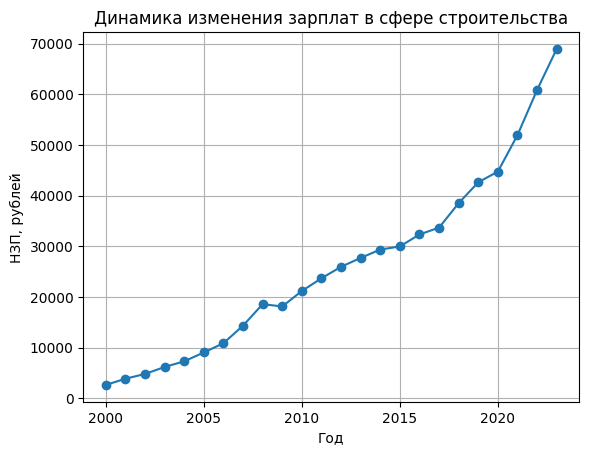

In [ ]:
construction = df_salaries.loc['строительство']
plt.plot(years, construction, marker='o')
plt.title('Динамика изменения зарплат в сфере строительства')
plt.xlabel('Год')
plt.ylabel('НЗП, рублей')
plt.grid()
plt.show()

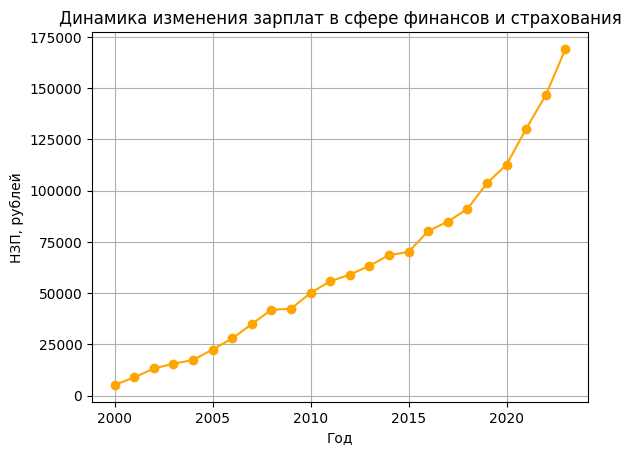

In [ ]:
finance = df_salaries.loc['финансы и страхование']
plt.plot(years, finance, marker='o', color='orange')
plt.title('Динамика изменения зарплат в сфере финансов и страхования')
plt.xlabel('Год')
plt.ylabel('НЗП, рублей')
plt.grid()
plt.show()

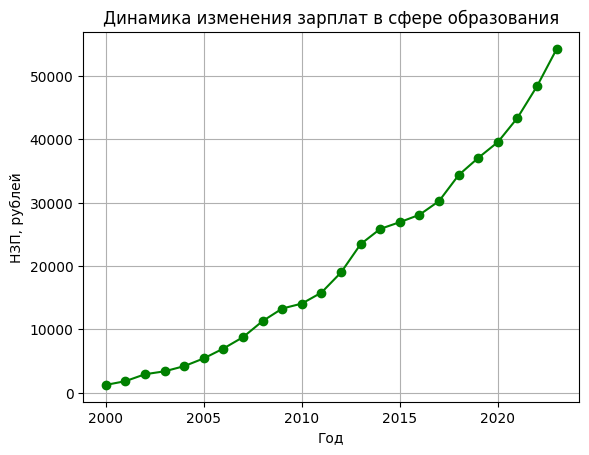

In [ ]:
education = df_salaries.loc['образование']
plt.plot(years, education, marker='o', color='green')
plt.title('Динамика изменения зарплат в сфере образования')
plt.xlabel('Год')
plt.ylabel('НЗП, рублей')
plt.grid()
plt.show()

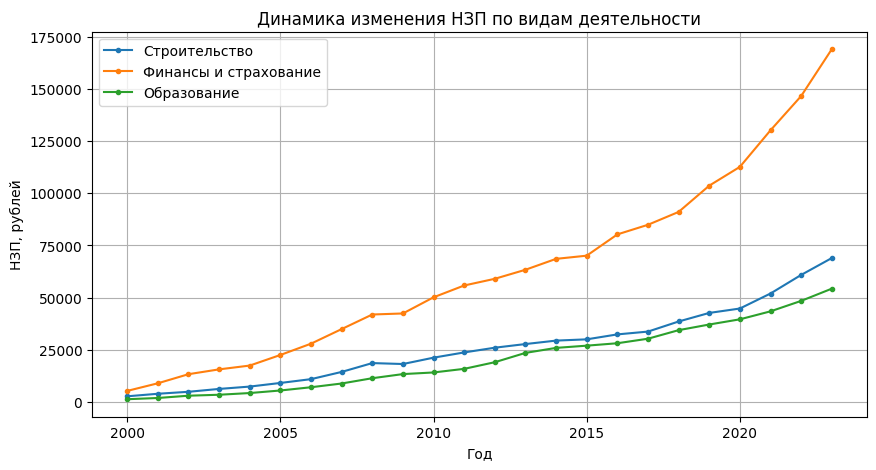

In [ ]:
plt.figure(figsize=(10, 5))
plt.title('Динамика изменения НЗП по видам деятельности')
plt.plot(years, construction, marker='.', label='Строительство')
plt.plot(years, finance, marker='.', label='Финансы и страхование')
plt.plot(years, education, marker='.', label='Образование')
plt.xlabel('Год')
plt.ylabel('НЗП, рублей')
plt.legend(loc=2)
plt.grid()
plt.show()

**Выводы:**
* По всем видам деятельности наблюдается положительная динамика изменения уровня номинальных заработных плат.
* Самый высокий уровень НЗП в сфере финансов и страхования, а самый низкий - в образовании.
* Уровень НЗП в сфере строительства практически совпадает с уровнем НЗП в образовании и показывает схожую динамику. При этом в финансовой и страховой деятельности наблюдается сильный рост НЗП.



# Расчет реальной заработной платы
Для того чтобы рассчитать реальную заработную плату (РЗП), используем формулу:\
РЗП = НЗП/ ИПЦ *100%,\
где ИПЦ - индекс потребительских цен или темпы инфляции.